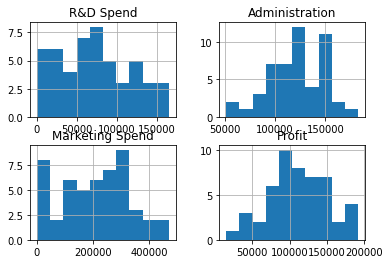

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000
Hệ số intercept là: -50385.82883510302
Hệ số coeffient là: [1.10797715]
Intercept của mô hình: -37182.30912423563
Coeffient của mô hình: [8.39353178e-01 1.19427444e-06]
Độ chính xác của mô hình: 0.9497292340096265
Intercept là: -50505.23118167689
Coeffient là: [ 1.11426192 -0.00277015]
Độ chính xác: 0.946559327095281


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


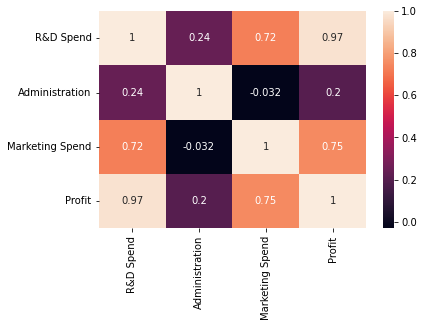

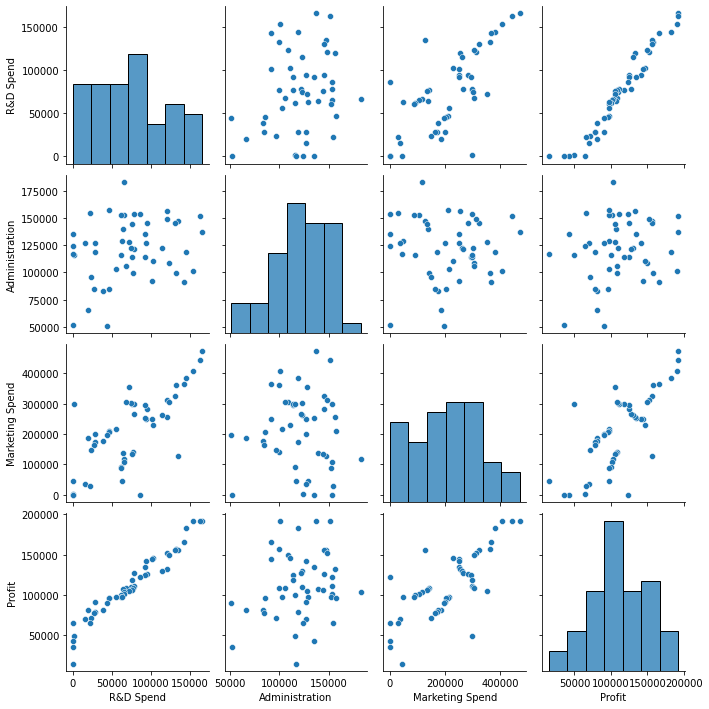

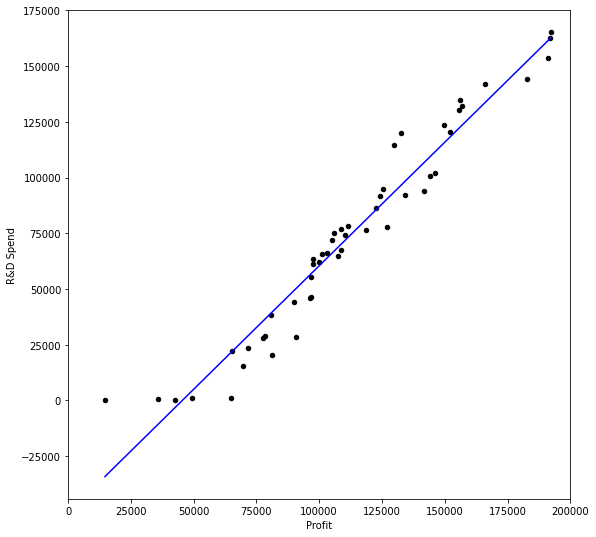

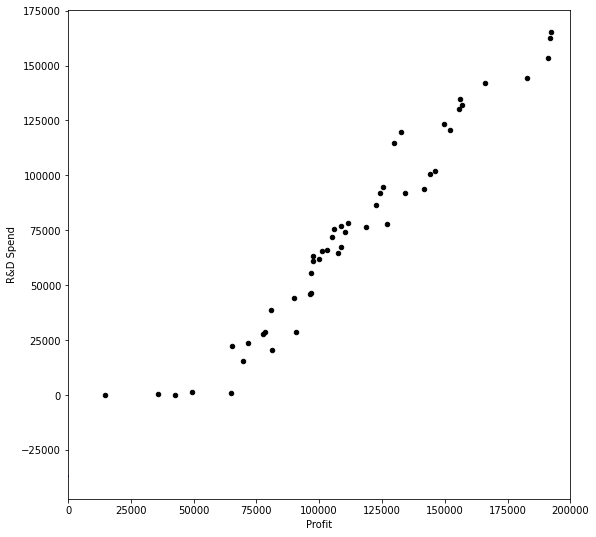

In [9]:
import pandas as pd
url = '/content/Startups.csv'
data = pd.read_csv(url)
data.head()

import matplotlib.pyplot as plt
data.hist()
plt.show()

correlation = data.corr()
print(correlation)

import seaborn as sns
sns.heatmap(correlation,annot = True)
sns.pairplot(data)

from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['Profit']),y=data['R&D Spend'])
print('Hệ số intercept là:',model.intercept_)
print('Hệ số coeffient là:',model.coef_)

model.score(X=pd.DataFrame(data['Profit']),y=data['R&D Spend'])

y_pred = model.predict(X=pd.DataFrame(data['Profit']))
data.plot(kind='scatter',x='Profit',y='R&D Spend',figsize=(9,9),color='black',xlim=(0,200000))
plt.plot(data['Profit'],y_pred,color='blue')

model = linear_model.LinearRegression()
X=pd.DataFrame([data['Profit'],data['Profit']**2]).T
model.fit(X,y=data['R&D Spend'])
print('Intercept của mô hình:',model.intercept_)
print('Coeffient của mô hình:',model.coef_)
print('Độ chính xác của mô hình:',model.score(X=pd.DataFrame([data['Profit'],data['Profit']**2]).T,y=data['R&D Spend']))

#Bậc 2
import numpy as np
range = np.arange(1.5,5.5,0.1)
X_range=pd.DataFrame([range,range**2]).T
y_pred = model.predict(X=X_range)
data.plot(kind='scatter',x='Profit',y='R&D Spend',figsize=(9,9),color='black',xlim=(0,200000))
plt.plot(range,y_pred,color='blue')


model=linear_model.LinearRegression()
model.fit(X=data.loc[:,['Profit','Marketing Spend']],y=data['R&D Spend'])
print('Intercept là:',model.intercept_)
print('Coeffient là:',model.coef_)
print('Độ chính xác:',model.score(X=data.loc[:,['Profit','Marketing Spend']],y=data['R&D Spend']))
